In [24]:
#Train your first classification tree

#In this exercise you'll work with the Wisconsin Breast 
#Cancer Dataset from the UCI machine learning repository.
# You'll predict whether a tumor is malignant or benign 
#based on two features: the mean radius of the tumor 
#(radius_mean) and its mean number of concave points 
#(concave points_mean).

#The dataset is already loaded in your workspace and is 
#split into 80% train and 20% test. The feature matrices are 
#assigned to X_train and X_test, while the arrays of 
#labels are assigned to y_train and y_test where class 1 
#corresponds to a malignant tumor and class 0 corresponds 
#to a benign tumor. To obtain reproducible results, we also 
#defined a variable called SEED which is set to 1.

#Import DecisionTreeClassifier from sklearn.tree.

#Instantiate a DecisionTreeClassifier dt of maximum 
#depth equal to 6.

#Fit dt to the training set.

#Predict the test set labels and assign the result to 
#y_pred.

# Import DecisionTreeClassifier from sklearn.tree
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
from sklearn.model_selection import train_test_split

df=pd.read_csv('wbc.csv')
X = df[['radius_mean', 'concave points_mean']]
y = df['diagnosis']
y = y.map({'M':1, 'B':0})

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


# Instantiate a DecisionTreeClassifier 'dt' with a maximum depth of 6
dt = DecisionTreeClassifier(max_depth=6, random_state=1)

# Fit dt to the training set
dt.fit(X_train, y_train)

# Predict test set labels
y_pred = dt.predict(X_test)
print(y_pred[0:5])


[1 0 0 1 0]


In [9]:
#Evaluate the classification tree

#Now that you've fit your first classification tree, it's time to 
#evaluate its performance on the test set. You'll do so using 
#the accuracy metric which corresponds to the fraction of 
#correct predictions made on the test set.

#The trained model dt from the previous exercise is loaded 
#in your workspace along with the test set features matrix 
#X_test and the array of labels y_test.

#Instructions

#Import the function accuracy_score from 
#sklearn.metrics.

#Predict the test set labels and assign the obtained array 
#to y_pred.

#Evaluate the test set accuracy score of dt by calling 
#accuracy_score() and assign the value to acc.

# Import accuracy_score
from sklearn.metrics import accuracy_score

# Predict test set labels
y_pred = dt.predict(X_test)

# Compute test set accuracy  
acc = accuracy_score(y_test, y_pred)
print("Test set accuracy: {:.2f}".format(acc))


Test set accuracy: 0.87


C:\Users\luis hernandez\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\luis hernandez\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


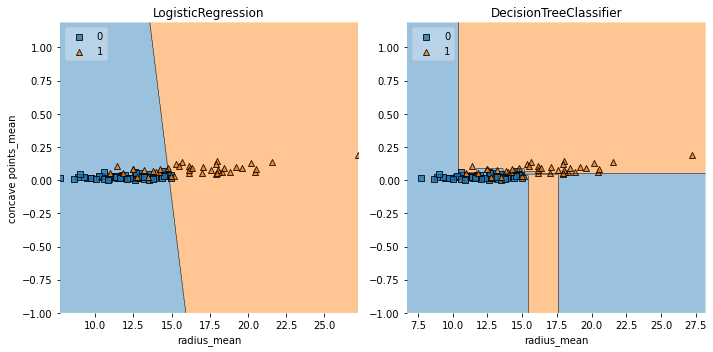

In [25]:
#Logistic regression vs classification tree

#A classification tree divides the feature space into 
#rectangular regions. In contrast, a linear model such as 
#logistic regression produces only a single linear decision 
#boundary dividing the feature space into 
#two decision regions.

#We have written a custom function called 
#plot_labeled_decision_regions() that you can use to 
#plot the decision regions of a list containing two trained 
#classifiers. You can type 
#help(plot_labeled_decision_regions) in the IPython 
#shell to learn more about this function.

#X_train, X_test, y_train, y_test, the model dt that 
#you've trained in an earlier exercise , as well as the 
#function plot_labeled_decision_regions() are available 
#in your workspace.

#Instructions

#Import LogisticRegression from 
#sklearn.linear_model.

#Instantiate a LogisticRegression model and assign it to
# logreg.

#Fit logreg to the training set.

#Review the plot generated by 
#plot_labeled_decision_regions().

from mlxtend.plotting import plot_decision_regions


def plot_labeled_decision_regions(X,y, models):
    '''Function producing a scatter plot of the instances contained 
    in the 2D dataset (X,y) along with the decision 
    regions of two trained classification models contained in the
    list 'models'.
    
    Parameters
    ----------
    X: pandas DataFrame corresponding to two numerical features 
    y: pandas Series corresponding the class labels
    models: list containing two trained classifiers 
    
    '''
    if len(models) != 2:
        raise Exception('''Models should be a list containing only two trained classifiers.''')
    if not isinstance(X, pd.DataFrame):
        raise Exception('''X has to be a pandas DataFrame with two numerical features.''')
    if not isinstance(y, pd.Series):
        raise Exception('''y has to be a pandas Series corresponding to the labels.''')
    fig, ax = plt.subplots(1, 2, figsize=(10.0, 5), sharey=True)
    for i, model in enumerate(models):
        plot_decision_regions(X.values, y.values, model, legend= 2, ax = ax[i])
        ax[i].set_title(model.__class__.__name__)
        ax[i].set_xlabel(X.columns[0])
        if i == 0:
            ax[i].set_ylabel(X.columns[1])
            ax[i].set_ylim(X.values[:,1].min(), X.values[:,1].max())
            ax[i].set_xlim(X.values[:,0].min(), X.values[:,0].max())
    plt.tight_layout()

# Import LogisticRegression from sklearn.linear_model
from sklearn.linear_model import  LogisticRegression
import matplotlib.pyplot as plt

# Instatiate logreg
logreg = LogisticRegression(random_state=1)

# Fit logreg to the training set
logreg.fit(X_train, y_train)

# Define a list called clfs containing the two classifiers logreg and dt
clfs = [logreg, dt]

# Review the decision regions of the two classifiers
plot_labeled_decision_regions(X_test, y_test, clfs)

#Great work! Notice how the decision boundary produced 
#by logistic regression is linear while the boundaries produced 
#by the classification tree divide the feature space into rectangular
 #regions.


In [26]:
#Using entropy as a criterion

#In this exercise, you'll train a classification tree on the 
#Wisconsin Breast Cancer dataset using entropy as an 
#information criterion. You'll do so using all the 30 features 
#in the dataset, which is split into 80% train and 20% test.

#X_train as well as the array of labels y_train are 
#available in your workspace.

#Instructions

#Import DecisionTreeClassifier from sklearn.tree.

#Instantiate a DecisionTreeClassifier dt_entropy with a maximum depth of 8.

#Set the information criterion to 'entropy'.

#Fit dt_entropy on the training set.

# Import DecisionTreeClassifier from sklearn.tree
from sklearn.tree import DecisionTreeClassifier

# Instantiate dt_entropy, set 'entropy' as the information criterion
dt_entropy = DecisionTreeClassifier(max_depth=8, criterion='entropy', random_state=1)

# Fit dt_entropy to the training set
dt_entropy.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=8, random_state=1)

In [31]:
#Entropy vs Gini index

#In this exercise you'll compare the test set accuracy of 
#dt_entropy to the accuracy of another tree named 
#dt_gini. The tree dt_gini was trained on the same 
#dataset using the same parameters except for the 
#information criterion which was set to the gini index using 
#the keyword 'gini'.

#X_test, y_test, dt_entropy, as well as accuracy_gini 
#which corresponds to the test set accuracy achieved by 
#dt_gini are available in your workspace.

dt_gini = DecisionTreeClassifier(max_depth=8, criterion='gini', random_state=1)
dt_gini.fit(X_train, y_train)

#Instructions

#Import accuracy_score from sklearn.metrics.

#Predict the test set labels of dt_entropy and assign the 
#result to y_pred.

#Evaluate the test set accuracy of dt_entropy and assign 
#the result to accuracy_entropy.

#Review accuracy_entropy and accuracy_gini.

# Import accuracy_score from sklearn.metrics
from sklearn.metrics import accuracy_score

# Use dt_entropy to predict test set labels
y_pred= dt_entropy.predict(X_test)
y_pred_gini = dt_gini.predict(X_test)


# Evaluate accuracy_entropy
accuracy_entropy = accuracy_score(y_test, y_pred)
accuracy_gini = accuracy_score(y_test, y_pred_gini)

# Print accuracy_entropy
print('Accuracy achieved by using entropy: ', accuracy_entropy)

# Print accuracy_gini
print('Accuracy achieved by using the gini index: ', accuracy_gini)


#Nice work! Notice how the two models achieve exactly 
#the same accuracy. Most of the time, the gini index and 
#entropy lead to the same results. The gini index is slightly 
#faster to compute and is the default criterion used in the 
#DecisionTreeClassifier model of scikit-learn-


Accuracy achieved by using entropy:  0.8947368421052632
Accuracy achieved by using the gini index:  0.8859649122807017


In [32]:
#Train your first regression tree

#In this exercise, you'll train a regression tree to predict the 
#mpg (miles per gallon) consumption of cars in the auto-
#mpg dataset using all the six available features.

#The dataset is processed for you and is split to 80% train 
#and 20% test. The features matrix X_train and the array 
#y_train are available in your workspace.

#Instructions

#Import DecisionTreeRegressor from sklearn.tree.

#Instantiate a DecisionTreeRegressor dt with maximum 
#depth 8 and min_samples_leaf set to 0.13.

#Fit dt to the training set.

# Import DecisionTreeRegressor from sklearn.tree
from sklearn.tree import DecisionTreeRegressor

# Instantiate dt
dt = DecisionTreeRegressor(max_depth=8,
             min_samples_leaf=0.13,
            random_state=3)

# Fit dt to the training set
dt.fit(X_train, y_train)



DecisionTreeRegressor(max_depth=8, min_samples_leaf=0.13, random_state=3)

In [33]:
#Evaluate the regression tree

#In this exercise, you will evaluate the test set performance 
#of dt using the Root Mean Squared Error (RMSE) metric.
# The RMSE of a model measures, on average, how much the 
#model's predictions differ from the actual labels. The RMSE 
#of a model can be obtained by computing the square root
 #of the model's Mean Squared Error (MSE).

#The features matrix X_test, the array y_test, as well as 
#the decision tree regressor dt that you trained in the 
#previous exercise are available in your workspace.

#Instructions

#Import the function mean_squared_error as MSE from 
#sklearn.metrics.

#Predict the test set labels and assign the output to 
#y_pred.

#Compute the test set MSE by calling MSE and assign the 
#result to mse_dt.

#Compute the test set RMSE and assign it to rmse_dt.


# Import mean_squared_error from sklearn.metrics as MSE
from sklearn.metrics import mean_squared_error as MSE

# Compute y_pred
y_pred = dt.predict(X_test)

# Compute mse_dt
mse_dt = MSE(y_test, y_pred)

# Compute rmse_dt
rmse_dt = mse_dt**0.5

# Print rmse_dt
print("Test set RMSE of dt: {:.2f}".format(rmse_dt))


Test set RMSE of dt: 0.27


In [35]:
#Linear regression vs regression tree

#In this exercise, you'll compare the test set RMSE of dt to 
#that achieved by a linear regression model. We have 
#already instantiated a linear regression model lr and 
#trained it on the same dataset as dt.

#The features matrix X_test, the array of labels y_test, 
#the trained linear regression model lr,
 #mean_squared_error function which was imported under
 #the alias MSE and rmse_dt from the previous exercise are
 #available in your workspace.
    
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(X_train, y_train)

#Instructions

#Predict test set labels using the linear regression model 
#(lr) and assign the result to y_pred_lr.

#Compute the test set MSE and assign the result to mse_lr.

#Compute the test set RMSE and assign the result to rmse_lr.

# Predict test set labels 
y_pred_lr = lr.predict(X_test)

# Compute mse_lr
mse_lr = MSE(y_test, y_pred_lr)

# Compute rmse_lr
rmse_lr = mse_lr**0.5

# Print rmse_lr
print('Linear Regression test set RMSE: {:.2f}'.format(rmse_lr))

# Print rmse_dt
print('Regression Tree test set RMSE: {:.2f}'.format(rmse_dt))



Linear Regression test set RMSE: 0.31
Regression Tree test set RMSE: 0.27


In [36]:
#Define the bagging classifier

#In the following exercises you'll work with the Indian Liver 
#Patient dataset from the UCI machine learning repository. 
#Your task is to predict whether a patient suffers from a 
#liver disease using 10 features including Albumin, age and 
#gender. You'll do so using a Bagging Classifier.

#Instructions

#Import DecisionTreeClassifier from sklearn.tree 
#and BaggingClassifier from sklearn.ensemble.

#Instantiate a DecisionTreeClassifier called dt.

#Instantiate a BaggingClassifier called bc consisting of 
#50 trees.

# Import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

# Import BaggingClassifier
from sklearn.ensemble import BaggingClassifier

# Instantiate dt
dt = DecisionTreeClassifier(random_state=1)

# Instantiate bc
bc = BaggingClassifier(base_estimator=dt, n_estimators=50, random_state=1)


In [37]:
#Evaluate Bagging performance

#Now that you instantiated the bagging classifier, it's time 
#to train it and evaluate its test set accuracy.

#The Indian Liver Patient dataset is processed for you and 
#split into 80% train and 20% test. The feature matrices 
#X_train and X_test, as well as the arrays of labels 
#y_train and y_test are available in your workspace. In 
#addition, we have also loaded the bagging classifier bc 
#that you instantiated in the previous exercise and the 
#function accuracy_score() from sklearn.metrics.

#Instructions

#Fit bc to the training set.

#Predict the test set labels and assign the result to y_pred.

#Determine bc's test set accuracy.

# Fit bc to the training set
bc.fit(X_train, y_train)

# Predict test set labels
y_pred = bc.predict(X_test)

# Evaluate acc_test
acc_test = accuracy_score(y_pred, y_test)
print('Test set accuracy of bc: {:.2f}'.format(acc_test)) 


Test set accuracy of bc: 0.90


In [38]:
#Prepare the ground

#In the following exercises, you'll compare the OOB 
#accuracy to the test set accuracy of a bagging classifier 
#trained on the Indian Liver Patient dataset.

#In sklearn, you can evaluate the OOB accuracy of an 
#ensemble classifier by setting the parameter oob_score 
#to True during instantiation. After training the classifier, 
#the OOB accuracy can be obtained by accessing the
# .oob_score_ attribute from the corresponding instance.

#In your environment, we have made available the class 
#DecisionTreeClassifier from sklearn.tree.

#Instructions

#Import BaggingClassifier from sklearn.ensemble.

#Instantiate a DecisionTreeClassifier with 
#min_samples_leaf set to 8.

#Instantiate a BaggingClassifier consisting of 50 
#trees and set oob_score to True.

# Import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

# Import BaggingClassifier
from sklearn.ensemble import BaggingClassifier

# Instantiate dt
dt = DecisionTreeClassifier(min_samples_leaf=8, random_state=1)

# Instantiate bc
bc = BaggingClassifier(base_estimator=dt, 
            n_estimators=50,
            oob_score=True,
            random_state=1)



In [39]:
#OOB Score vs Test Set Score

#Now that you instantiated bc, you will fit it to the training 
#set and evaluate its test set and OOB accuracies.

#The dataset is processed for you and split into 80% train 
#and 20% test. The feature matrices X_train and X_test,
 #as well as the arrays of labels y_train and y_test are
 #available in your workspace. In addition, we have also
 #loaded the classifier bc instantiated in the previous
 #exercise and the function accuracy_score() from
 #sklearn.metrics.

#Instructions

#Fit bc to the training set and predict the test set labels
 #and assign the results to y_pred.

#Evaluate the test set accuracy acc_test by calling
 #accuracy_score.

#Evaluate bc's OOB accuracy acc_oob by extracting the
 #attribute oob_score_ from bc.

# Fit bc to the training set 
bc.fit(X_train, y_train)

# Predict test set labels
y_pred = bc.predict(X_test)

# Evaluate test set accuracy
acc_test = accuracy_score(y_test, y_pred)

# Evaluate OOB accuracy
acc_oob = bc.oob_score_

# Print acc_test and acc_oob
print('Test set accuracy: {:.3f}, OOB accuracy: {:.3f}'.format(acc_test, acc_oob))


Test set accuracy: 0.930, OOB accuracy: 0.895


In [40]:
#Train an RF regressor

#In the following exercises you'll predict bike rental demand 
#in the Capital Bikeshare program in Washington, D.C using
 #historical weather data from the Bike Sharing Demand
 #dataset available through Kaggle. For this purpose, you will
 #be using the random forests algorithm. As a first step, you'll
 #define a random forests regressor and fit it to the training
 #set.

#The dataset is processed for you and split into 80% train
 #and 20% test. The features matrix X_train and the array
 #y_train are available in your workspace.

#Instructions

#Import RandomForestRegressor from sklearn.ensemble.

#Instantiate a RandomForestRegressor called rf 
#consisting of 25 trees.

#Fit rf to the training set.

# Import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
# Instantiate rf
rf = RandomForestRegressor(n_estimators=25,
            random_state=2)
            
# Fit rf to the training set    
rf.fit(X_train, y_train)


RandomForestRegressor(n_estimators=25, random_state=2)

In [41]:
#Evaluate the RF regressor

#You'll now evaluate the test set RMSE of the random
 #forests regressor rf that you trained in the previous
 #exercise.

#The dataset is processed for you and split into 80% train
 #and 20% test. The features matrix X_test, as well as the
 #array y_test are available in your workspace. In addition,
 #we have also loaded the model rf that you trained in the
 #previous exercise.

#Instructions

#Import mean_squared_error from sklearn.metrics as
 #MSE.

#Predict the test set labels and assign the result to
 #y_pred.

#Compute the test set RMSE and assign it to rmse_test

# Import mean_squared_error as MSE
from sklearn.metrics import mean_squared_error as MSE

# Predict the test set labels
y_pred = rf.predict(X_test)

# Evaluate the test set RMSE
rmse_test = MSE(y_test,y_pred)**0.5

# Print rmse_test
print('Test set RMSE of rf: {:.2f}'.format(rmse_test))


Test set RMSE of rf: 0.27


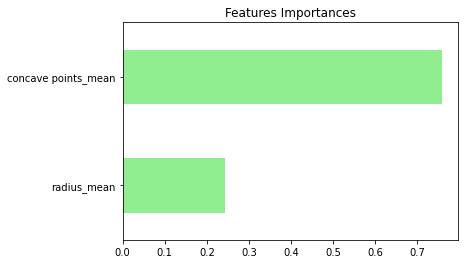

In [42]:
#Visualizing features importances

#In this exercise, you'll determine which features were the
 #most predictive according to the random forests regressor
 #rf that you trained in a previous exercise.

#For this purpose, you'll draw a horizontal barplot of the
 #feature importance as assessed by rf. Fortunately, this
 #can be done easily thanks to plotting capabilities of
 #pandas.

#We have created a pandas.Series object called
 #importances containing the feature names as index and
 #their importances as values. In addition,
 #matplotlib.pyplot is available as plt and pandas as
 #pd.

#Instructions

#Call the .sort_values() method on importances and assign the result to importances_sorted.

#Call the .plot() method on importances_sorted and set the arguments:

#kind to 'barh'
#color to 'lightgreen'

# Create a pd.Series of features importances
importances = pd.Series(data=rf.feature_importances_,
                        index= X_train.columns)

# Sort importances
importances_sorted = importances.sort_values()

# Draw a horizontal barplot of importances_sorted
importances_sorted.plot(kind='barh', color='lightgreen')
plt.title('Features Importances')
plt.show()


In [62]:
#Define the AdaBoost classifier

#In the following exercises you'll revisit the Indian Liver 
#Patient dataset which was introduced in a previous
 #chapter. Your task is to predict whether a patient suffers
 #from a liver disease using 10 features including Albumin,
 #age and gender. However, this time, you'll be training an
 #AdaBoost ensemble to perform the classification task. In
 #addition, given that this dataset is imbalanced, you'll be
 #using the ROC AUC score as a metric instead of accuracy.

#As a first step, you'll start by instantiating an AdaBoost
 #classifier.

#Instructions

#Import AdaBoostClassifier from sklearn.ensemble.

#Instantiate a DecisionTreeClassifier with max_depth
 #set to 2.

#Instantiate an AdaBoostClassifier consisting of 180
 #trees and setting the base_estimator to dt.

# Import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

# Import AdaBoostClassifier
from sklearn.ensemble import AdaBoostClassifier

# Instantiate dt
dt = DecisionTreeClassifier(max_depth=2, refit=True, random_state=1)

# Instantiate ada
ada = AdaBoostClassifier(base_estimator=dt, n_estimators=180, random_state=1)


TypeError: DecisionTreeClassifier.__init__() got an unexpected keyword argument 'refit'

In [44]:
#Train the AdaBoost classifier

#Now that you've instantiated the AdaBoost classifier ada,
 #it's time train it. You will also predict the probabilities of
 #obtaining the positive class in the test set. This can be
 #done as follows:

#Once the classifier ada is trained, call the
 #.predict_proba() method by passing X_test as a
 #parameter and extract these probabilities by slicing all the
 #values in the second column as follows:

#ada.predict_proba(X_test)[:,1]

#The Indian Liver dataset is processed for you and split into
 #80% train and 20% test. Feature matrices X_train and
 #X_test, as well as the arrays of labels y_train and
 #y_test are available in your workspace. In addition, we
 #have also loaded the instantiated model ada from the
 #previous exercise.

#Instructions

#Fit ada to the training set.

#Evaluate the probabilities of obtaining the positive class
 #in the test set.

# Fit ada to the training set
ada.fit(X_train,y_train)

# Compute the probabilities of obtaining the positive class
y_pred_proba = ada.predict_proba(X_test)[:,1]


In [63]:
#Evaluate the AdaBoost classifier

#Now that you're done training ada and predicting the
 #probabilities of obtaining the positive class in the test set,
 #it's time to evaluate ada's ROC AUC score. Recall that the
 #ROC AUC score of a binary classifier can be determined
 #using the roc_auc_score() function from sklearn.metrics.

#The arrays y_test and y_pred_proba that you computed
 #in the previous exercise are available in your workspace.

#Instructions

#Import roc_auc_score from sklearn.metrics.

#Compute ada's test set ROC AUC score, assign it to
 #ada_roc_auc, and print it out.

# Import roc_auc_score
from sklearn.metrics import roc_auc_score

# Evaluate test-set roc_auc_score
ada_roc_auc = roc_auc_score(y_test, y_pred_proba)

# Print roc_auc_score
print('ROC AUC score: {:.2f}'.format(ada_roc_auc))



ROC AUC score: 0.96


In [46]:
#Define the GB regressor

#You'll now revisit the Bike Sharing Demand dataset that
 #was introduced in the previous chapter. Recall that your
 #task is to predict the bike rental demand using historical
 #weather data from the Capital Bikeshare program in
 #Washington, D.C.. For this purpose, you'll be using a
 #gradient boosting regressor.

#As a first step, you'll start by instantiating a gradient
 #boosting regressor which you will train in the next exercise.

#Instructions

#Import GradientBoostingRegressor from
 #sklearn.ensemble.

#Instantiate a gradient boosting regressor by setting the
 #parameters:

#max_depth to 4

#n_estimators to 200

# Import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Instantiate gb
gb = GradientBoostingRegressor(max_depth=4, 
            n_estimators=200,
            random_state=2)


In [64]:
#Train the GB regressor

#You'll now train the gradient boosting regressor gb that
 #you instantiated in the previous exercise and predict test
 #set labels.

#The dataset is split into 80% train and 20% test. Feature
 #matrices X_train and X_test, as well as the arrays
 #y_train and y_test are available in your workspace. In
 #addition, we have also loaded the model instance gb that
 #you defined in the previous exercise.

#Instructions

#Fit gb to the training set.

#Predict the test set labels and assign the result to
 #y_pred.

# Fit gb to the training set
gb.fit(X_train,y_train)

# Predict test set labels
y_pred = gb.predict(X_test)


In [48]:
#Evaluate the GB regressor

#Now that the test set predictions are available, you can 
#use them to evaluate the test set Root Mean Squared Error
 #(RMSE) of gb.

#y_test and predictions y_pred are available in your
 #workspace.

#Instructions

#Import mean_squared_error from sklearn.metrics 
#as MSE.

#Compute the test set MSE and assign it to mse_test.

#Compute the test set RMSE and assign it to rmse_test.

# Import mean_squared_error as MSE
from sklearn.metrics import mean_squared_error as MSE

# Compute MSE
mse_test = MSE(y_test,y_pred)

# Compute RMSE
rmse_test = mse_test**0.5

# Print RMSE
print('Test set RMSE of gb: {:.3f}'.format(rmse_test))


Test set RMSE of gb: 0.301


In [65]:
#Regression with SGB

#As in the exercises from the previous lesson, you'll be
 #working with the Bike Sharing Demand dataset. In the
 #following set of exercises, you'll solve this bike count
 #regression problem using stochastic gradient boosting.

#Instructions

#Instantiate a Stochastic Gradient Boosting Regressor
 #(SGBR) and set:

#max_depth to 4 and n_estimators to 200,

#subsample to 0.9, and

#max_features to 0.75.

# Import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Instantiate sgbr
sgbr = GradientBoostingRegressor(max_depth=4, 
            subsample=0.9,
            max_features=0.75,
            n_estimators=200,                                
            random_state=2)


In [52]:
#Train the SGB regressor

#In this exercise, you'll train the SGBR sgbr instantiated in
 #the previous exercise and predict the test set labels.

#The bike sharing demand dataset is already loaded
 #processed for you; it is split into 80% train and 20% test.
 #The feature matrices X_train and X_test, the arrays of
 #labels y_train and y_test, and the model instance
 #sgbr that you defined in the previous exercise are
 #available in your workspace.

#Instructions

#Fit sgbr to the training set.

#Predict the test set labels and assign the results to
#y_pred.

# Fit sgbr to the training set
sgbr.fit(X_train,y_train)

# Predict test set labels
y_pred = sgbr.predict(X_test)


In [66]:
#Evaluate the SGB regressor

#You have prepared the ground to determine the test set 
#RMSE of sgbr which you shall evaluate in this exercise.

#y_pred and y_test are available in your workspace.

#Instructions

#Import mean_squared_error as MSE from
 #sklearn.metrics.

#Compute test set MSE and assign the result to mse_test.

#Compute test set RMSE and assign the result to
 #rmse_test.

# Import mean_squared_error as MSE
from sklearn.metrics import mean_squared_error as MSE

# Compute test set MSE
mse_test = MSE(y_test,y_pred)

# Compute test set RMSE
rmse_test = mse_test**0.5

# Print rmse_test
print('Test set RMSE of sgbr: {:.3f}'.format(rmse_test))


Test set RMSE of sgbr: 0.301


In [54]:
#Set the tree's hyperparameter grid

#In this exercise, you'll manually set the grid of
 #hyperparameters that will be used to tune the 
#classification tree dt and find the optimal classifier in the 
#next exercise.

#Instructions

#Define a grid of hyperparameters corresponding to a 
#Python dictionary called params_dt with:

#the key 'max_depth' set to a list of values 2, 3, and 4

#the key 'min_samples_leaf' set to a list of values 
#0.12, 0.14, 0.16, 0.18

# Define params_dt
params_dt = {
    'max_depth':[2,3,4],
    'min_samples_leaf':[0.12,0.14,0.16,0.18]
            }


In [72]:
#Search for the optimal tree

#In this exercise, you'll perform grid search using 5-fold 
#cross validation to find dt's optimal hyperparameters. 
#Note that because grid search is an exhaustive process, it 
#may take a lot time to train the model. Here you'll only be 
#instantiating the GridSearchCV object without fitting it to 
#the training set. As discussed in the video, you can train
#such an object similar to any scikit-learn estimator by 
#using the .fit() method:

#grid_object.fit(X_train, y_train)

#An untuned classification tree dt as well as the dictionary
#params_dt that you defined in the previous exercise are 
#available in your workspace.

#Instructions

#Import GridSearchCV from sklearn.model_selection.

#Instantiate a GridSearchCV object using 5-fold CV by 
#setting the parameters:

#estimator to dt, param_grid to params_dt and

#scoring to 'roc_auc'.

# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

# Instantiate grid_dt
grid_dt = GridSearchCV(estimator=dt,
                       param_grid=params_dt,
                       scoring='roc_auc',
                       cv=5,
                       refit=True,
                       n_jobs=-1)


In [71]:
#Evaluate the optimal tree

#In this exercise, you'll evaluate the test set ROC AUC score
 #of grid_dt's optimal model.

#In order to do so, you will first determine the probability of 
#obtaining the positive label for each test set observation. 
#You can use the methodpredict_proba() of an sklearn 
#classifier to compute a 2D array containing the
 #probabilities of the negative and positive class-labels 
#respectively along columns.

#The dataset is already loaded and processed for you 
#(numerical features are standardized); it is split into 80%
 #train and 20% test. X_test, y_test are available in your 
#workspace. In addition, we have also loaded the trained
 #GridSearchCV object grid_dt that you instantiated in 
#the previous exercise. Note that grid_dt was trained as 
#follows:

#grid_dt.fit(X_train, y_train)

#Instructions

#Import roc_auc_score from sklearn.metrics.

#Extract the .best_estimator_ attribute from grid_dt 
#and assign it to best_model.

#Predict the test set probabilities of obtaining the positive 
#class y_pred_proba.

#Compute the test set ROC AUC score test_roc_auc of 
#best_model.

# Import roc_auc_score from sklearn.metrics
from sklearn.metrics import roc_auc_score

# Extract the best estimator
best_model = grid_dt.best_estimator_

# Predict the test set probabilities of the positive class
y_pred_proba = grid_dt.predict_proba(X_test)[:,1]

# Compute test_roc_auc
test_roc_auc = roc_auc_score(y_test,y_pred_proba)

# Print test_roc_auc
print('Test set ROC AUC score: {:.3f}'.format(test_roc_auc))


AttributeError: 'GridSearchCV' object has no attribute 'best_estimator_'

In [57]:
#Set the hyperparameter grid of RF

#In this exercise, you'll manually set the grid of hyperparameters that will
#be used to tune rf's hyperparameters and find the optimal regressor. For this purpose, 
#you will be constructing a grid of hyperparameters and tune the number of estimators, 
#the maximum number of features used when splitting each node and the minimum number of 
#samples (or fraction) per leaf.

#Instructions

#Define a grid of hyperparameters corresponding to a 
#Python dictionary called params_rf with:

#the key 'n_estimators' set to a list of values 100, 350, 500

#the key 'max_features' set to a list of values 'log2', 'auto', 'sqrt'

#the key 'min_samples_leaf' set to a list of values 2, 10, 30

# Define the dictionary 'params_rf'
params_rf = { 
    'n_estimators':[100,350,500],
    'max_features':['log2','auto','sqrt'],
    'min_samples_leaf':[2,10,30]

            }


In [74]:
#Search for the optimal forest

#In this exercise, you'll perform grid search using 3-fold 
#cross validation to find rf's optimal hyperparameters. To 
#evaluate each model in the grid, you'll be using the 
#negative mean squared error metric.

#Note that because grid search is an exhaustive search 
#process, it may take a lot time to train the model. Here 
#you'll only be instantiating the GridSearchCV object 
#without fitting it to the training set. As discussed in the 
#video, you can train such an object similar to any scikit-
#learn estimator by using the .fit() method:

#grid_object.fit(X_train, y_train)

#The untuned random forests regressor model rf 
#as well as the dictionary params_rf that you defined in the 
#previous exercise are available in your workspace.

#Instructions

#Import GridSearchCV from sklearn.model_selection.

#Instantiate a GridSearchCV object using 3-fold CV by 
#using negative mean squared error as the scoring metric.

# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

# Instantiate grid_rf
grid_rf = GridSearchCV(estimator=rf,
                       param_grid=params_rf,
                       scoring='neg_mean_squared_error',
                       cv=3,refit=True,
                       verbose=1,
                       n_jobs=-1)



In [73]:
#Evaluate the optimal forest

#In this last exercise of the course, you'll evaluate the test 
#set RMSE of grid_rf's optimal model.

#The dataset is already loaded and processed for you and 
#is split into 80% train and 20% test. In your environment 
#are available X_test, y_test and the function 
#mean_squared_error from sklearn.metrics under the 
#alias MSE. In addition, we have also loaded the trained 
#GridSearchCV object grid_rf that you instantiated in 
#the previous exercise. Note that grid_rf was trained 
#as follows:

#grid_rf.fit(X_train, y_train)

#Instructions

#Import mean_squared_error as MSE from 
#sklearn.metrics.

#Extract the best estimator from grid_rf and assign it to 
#best_model.

#Predict best_model's test set labels and assign the result 
#to y_pred.

#Compute best_model's test set RMSE.

# Import mean_squared_error from sklearn.metrics as MSE 
from sklearn.metrics import mean_squared_error as MSE

# Extract the best estimator
best_model = grid_rf.best_estimator_

# Predict test set labels
y_pred = best_model.predict(X_test)

# Compute rmse_test
rmse_test = MSE(y_test, y_pred)**(1/2)

# Print rmse_test
print('Test RMSE of best model: {:.3f}'.format(rmse_test)) 



AttributeError: 'GridSearchCV' object has no attribute 'best_estimator_'